In [1]:
import function as fn
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import matplotlib


In [2]:
font = {'family': 'normal',
        'weight': 'bold',
        'size': 22}
matplotlib.rc('font', **font)

main_color = '#0000b3'
main_color2 = '#b30000'
secondary_color = '#b3b3ff'

In [3]:
dataset_options = {
    1: 'data/mathoverflow/sx-mathoverflow-a2q.txt',
    2: 'data/mathoverflow/sx-mathoverflow-c2q.txt',
    3: 'data/mathoverflow/sx-mathoverflow-c2a.txt',
    4: 'data/mathoverflow/sx-askubuntu-a2q.txt',
    5: 'data/mathoverflow/sx-askubuntu-c2q.txt',
    6: 'data/mathoverflow/sx-askubuntu-c2a.txt',
    7: 'data/mathoverflow/sx-superuser-a2q.txt',
    8: 'data/mathoverflow/sx-superuser-c2q.txt',
    9: 'data/mathoverflow/sx-superuser-c2a.txt'
}

### GENERATE GRAPHS

In [4]:
nodes, edges_per_t = fn.read_graph_from_file(dataset_options[1])

In [5]:
G_undirected = fn.generate_weighted_aggregated_graph(nodes, edges_per_t, directed=False)
nx.write_gpickle(G_undirected, 'pickles/graphs/undirected_graph.gpickle') # This so we dont have to compute it everytime 

In [6]:
edges_per_t_day = fn.aggregate_edges_by_granularity(edges_per_t, 'day')
G_day = fn.generate_weighted_aggregated_graph(nodes, edges_per_t_day, directed=False)
nx.write_gpickle(G_day, 'pickles/graphs/undirected_graph_day.gpickle') # This so we dont have to compute it everytime


In [7]:
G_undirected = nx.read_gpickle('pickles/graphs/undirected_graph.gpickle')
G_day = nx.read_gpickle('pickles/graphs/undirected_graph_day.gpickle')

### BASIC INFORMATION ABOUT THE AGGREGATED GRAPH PER DAY

In [9]:
different_keys = []
total_edge_count = 0
for k, v in edges_per_t_day.items():
    different_keys.append(k)
    total_edge_count += len(v)
print('Temporal edges (new granularity)', total_edge_count)
print('Edges in static graph', len(G_undirected.edges()))
print('Total different days', len(different_keys))

Temporal edges (new granularity) 107581
Edges in static graph 88956
Total different days 2350


### INTERACTIONS PER DAY

C:\Users\rafai\Miniconda3\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


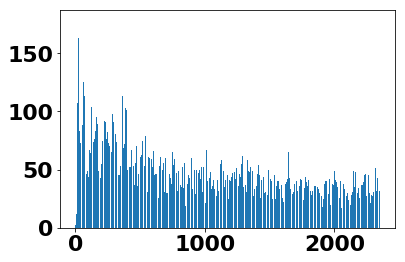

In [10]:
current_G = G_day
current_edges_per_t = edges_per_t_day
current_nodes = nodes
min_t = min([k for k in current_edges_per_t.keys()])
max_t = max([k for k in current_edges_per_t.keys()])

x = []
y = []
for k, v in current_edges_per_t.items():
    x.append(float(k))
    y.append(len(v))

plt.bar(x, y)
plt.show()

### DEGREE DISTRIBUTION

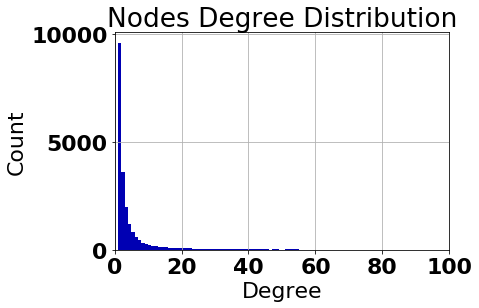

In [12]:
N = G_undirected.number_of_nodes()
E = G_undirected.number_of_edges()
link_density = nx.density(G_undirected)
assortativity = nx.degree_assortativity_coefficient(G_undirected)
clustering_coefficient = nx.average_clustering(G_undirected)
G_degrees = fn.get_graph_degrees(G_undirected)


def plot_degree_dist(G_degrees, degree="Degree"):
#     degree_list = G_degrees[:, 1]
#     max_degree = np.max(degree_list)
    x = np.arange(1, len(G_degrees) + 1)
    x, y = np.unique(G_degrees[:, 1], return_counts=True)
    # plt.figure(figsize=(15, 8), dpi= 180, facecolor='w', edgecolor='k')
    plt.bar(x, y, width=1, align='edge', color=main_color)
    # plt.plot(x_pow, y_pow, 'g-', linewidth=1, markersize=2)
    plt.xlabel(degree)
    plt.ylabel('Count')
    plt.title('Nodes {} Distribution'.format(degree))
    plt.xlim((0, 100))
    plt.grid(True)
    plt.show()


plot_degree_dist(G_degrees)

### METRICS FOR AGGREGATED GRAPH

In [13]:
def get_G_local_clustering(G):
    G_local_clustering = []
    for k, v in nx.clustering(G).items():
        k = int(k)
        G_local_clustering.append([k, v])
    G_local_clustering.sort(key=lambda tup: tup[0])
    return G_local_clustering


G_local_clustering = get_G_local_clustering(G_undirected)
print(len(G_local_clustering))

is_connected = True if nx.is_connected(G_undirected) else False
print("Is connected") if is_connected else print("Is not connected")

if is_connected:
    print("Average Shortest Path Length: {}".format(nx.average_shortest_path_length(G_undirected)))
    print("Diameter: {}".format(nx.diameter(G_undirected)))
    print("Spectral Radius: {}".format(np.max(nx.adjacency_spectrum(G_undirected))))


try:
    print("Algebraic Connectivity: {}".format(nx.algebraic_connectivity(G_undirected)))
except nx.exception.NetworkXError as e:
    print(e)

21688
Is not connected
Algebraic Connectivity: 0.0


In [14]:
print('Nodes: ', N)
print('Edges: ', E)
# print('Is connected?: ', nx.is_connected(G))
print('Link density: ', link_density)
print('Degree: ')
print(' - Mean: ', G_degrees[:, 1].mean())
print(' - Variance: ', G_degrees[:, 1].std() ** 2)
print(' - Std: ', G_degrees[:, 1].std())
print('Assortativity: ', assortativity)
print('Clustering coefficient: ', clustering_coefficient)


Nodes:  21688
Edges:  88956
Link density:  0.00037825637638555596
Degree: 
 - Mean:  8.203246034673553
 - Variance:  967.2440101198431
 - Std:  31.10054678168606
Assortativity:  -0.1349943598870361
Clustering coefficient:  0.09384549420391179
